In [17]:
# -------------------- IMPORTS --------------------
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray

In [45]:
# -------------------- NOISE FUNCTIONS --------------------
import numpy as np

def add_gaussian_noise(image, mean=0, sigma=25):
    """Add Gaussian noise"""
    gauss = np.random.normal(mean, sigma, image.shape).astype('float32')
    noisy = image.astype('float32') + gauss
    noisy = np.clip(noisy, 0, 255).astype('uint8')
    return noisy


def add_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    """Add Salt & Pepper noise"""
    noisy = np.copy(image)
    total_pixels = image.size

    # Salt noise
    num_salt = int(total_pixels * salt_prob)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy[tuple(coords)] = 255

    # Pepper noise
    num_pepper = int(total_pixels * pepper_prob)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy[tuple(coords)] = 0

    return noisy


def add_impulse_noise(image, noise_prob=0.02):
    """Add Impulse noise (random intensity spikes)"""
    noisy = np.copy(image)
    mask = np.random.choice([0, 1], size=image.shape, p=[1-noise_prob, noise_prob])
    random_vals = np.random.randint(0, 256, image.shape, dtype='uint8')
    noisy[mask==1] = random_vals[mask==1]
    return noisy


In [47]:
# -------------------- HISTOGRAM PLOTTING --------------------
def show_results(original, noisy, title):
    """Display original + noisy image with histograms"""
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Original Image
    axs[0,0].imshow(original, cmap='gray')
    axs[0,0].set_title("Original Image")
    axs[0,0].axis('off')

    # Noisy Image
    axs[0,1].imshow(noisy, cmap='gray')
    axs[0,1].set_title(f"{title} Noisy Image")
    axs[0,1].axis('off')

    # Original Histogram
    axs[1,0].hist(original.ravel(), bins=256, range=[0,256], color='blue')
    axs[1,0].set_title("Original Histogram")

    # Noisy Histogram
    axs[1,1].hist(noisy.ravel(), bins=256, range=[0,256], color='red')
    axs[1,1].set_title(f"{title} Histogram")

    plt.tight_layout()
    plt.show()


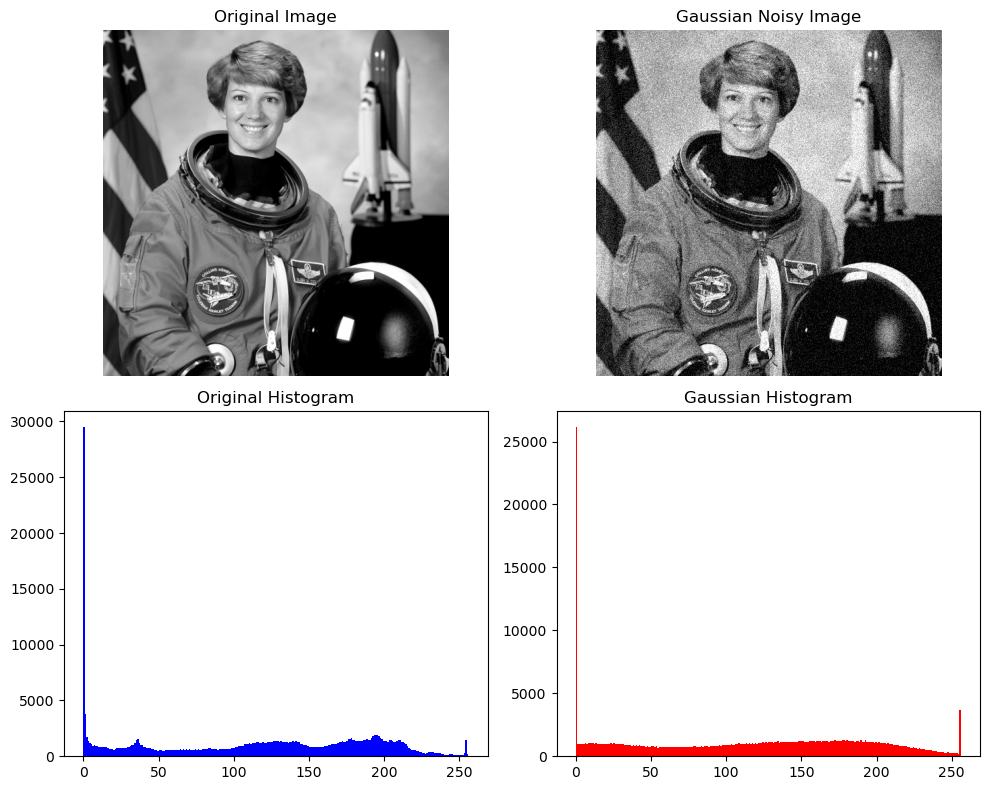

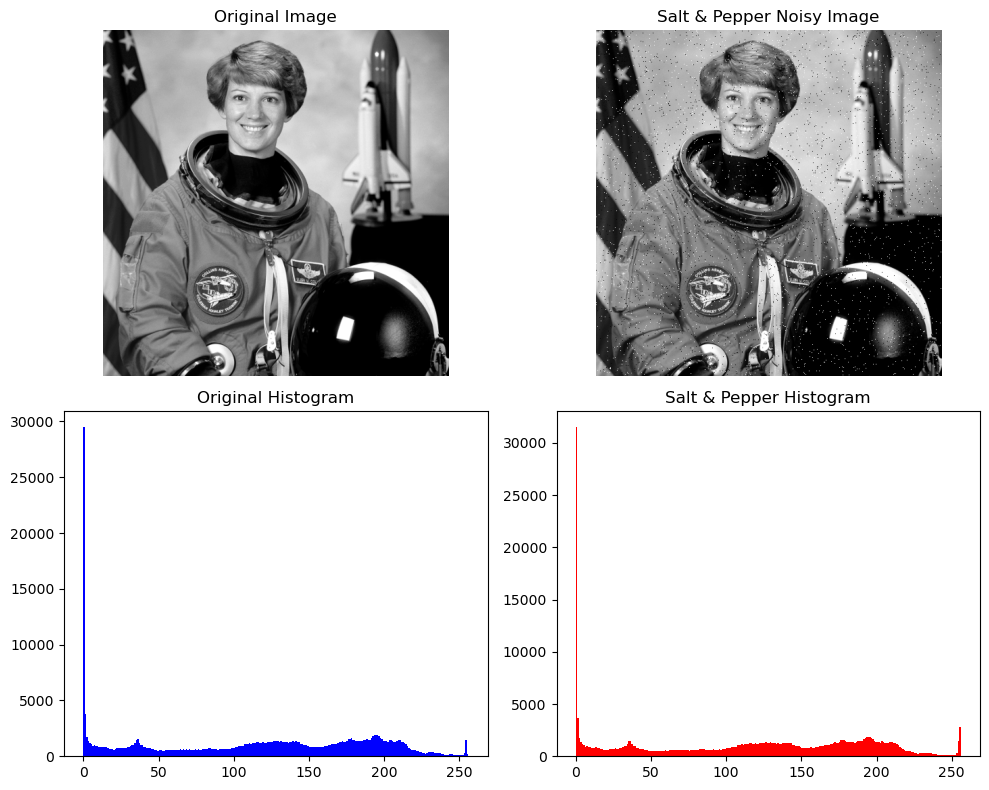

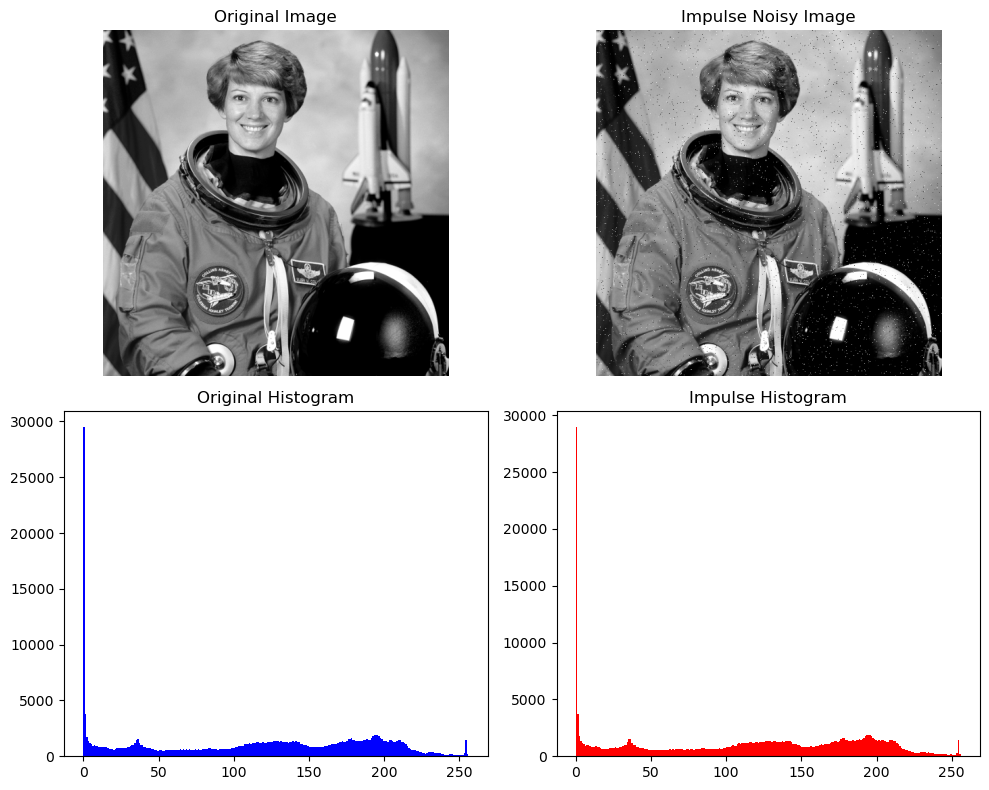

In [49]:
# -------------------- MAIN PROGRAM --------------------
# Load Lena image (from skimage)
lena = data.astronaut()   # RGB test image (astronaut/lena)
gray_lena = rgb2gray(lena) * 255   # Convert to grayscale and scale to 0-255
image = gray_lena.astype('uint8')

# Apply noise
gaussian_img = add_gaussian_noise(image)
sp_img = add_salt_pepper_noise(image)
impulse_img = add_impulse_noise(image)

# Show results
show_results(image, gaussian_img, "Gaussian")
show_results(image, sp_img, "Salt & Pepper")
show_results(image, impulse_img, "Impulse")


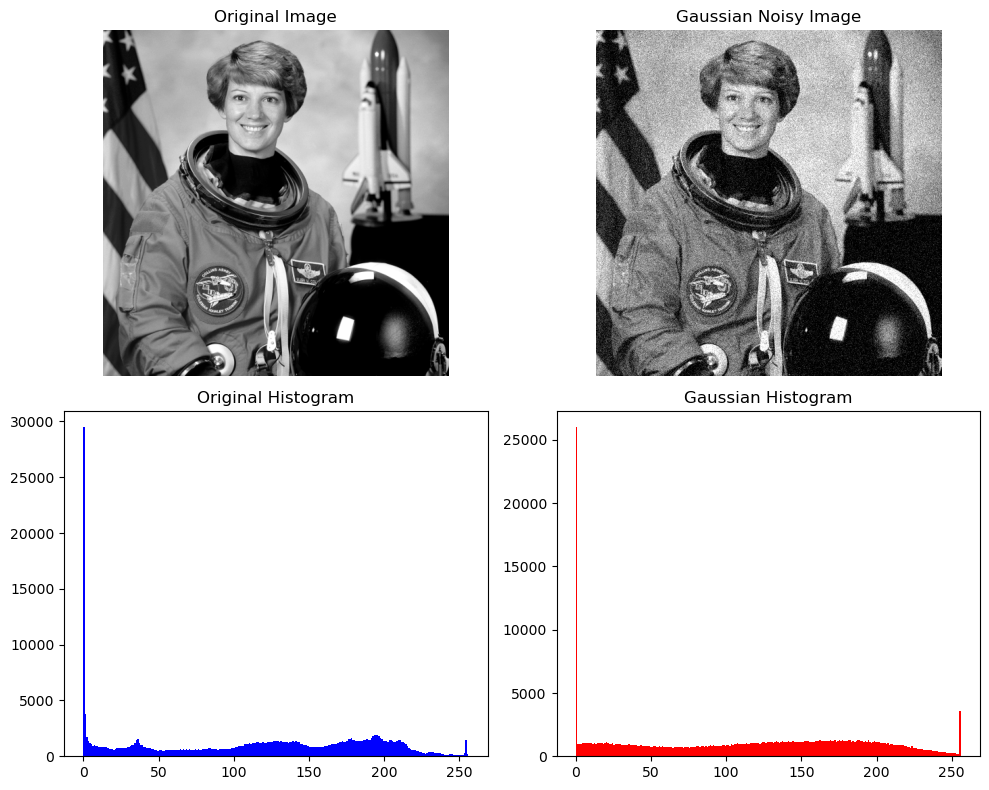

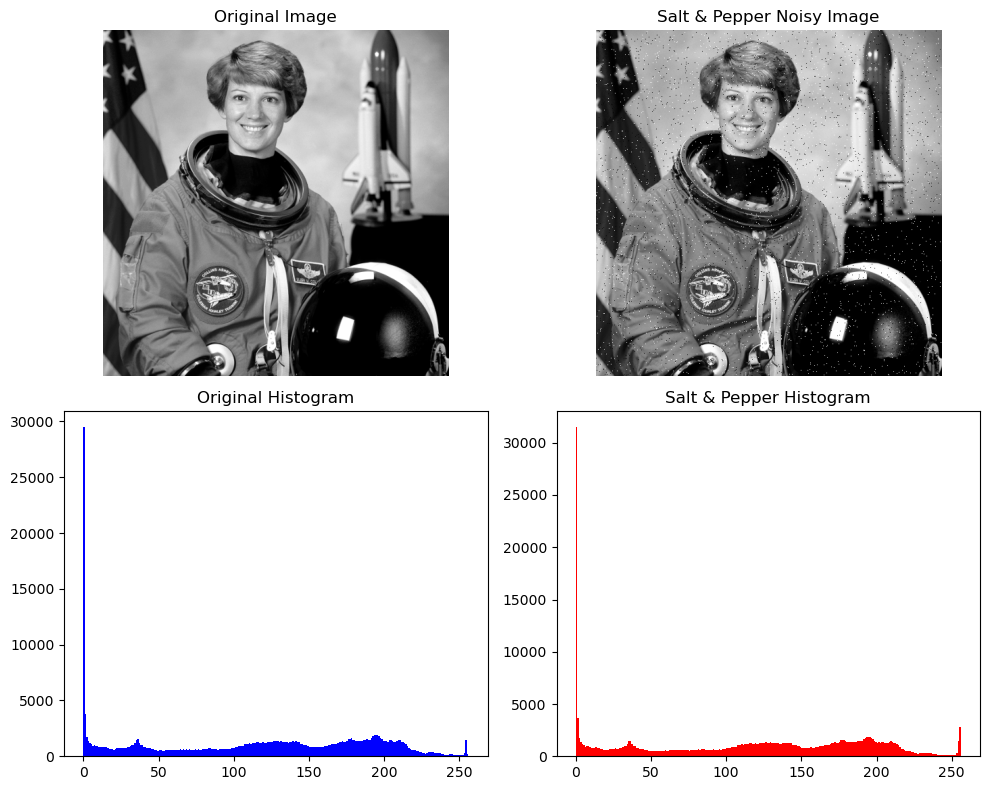

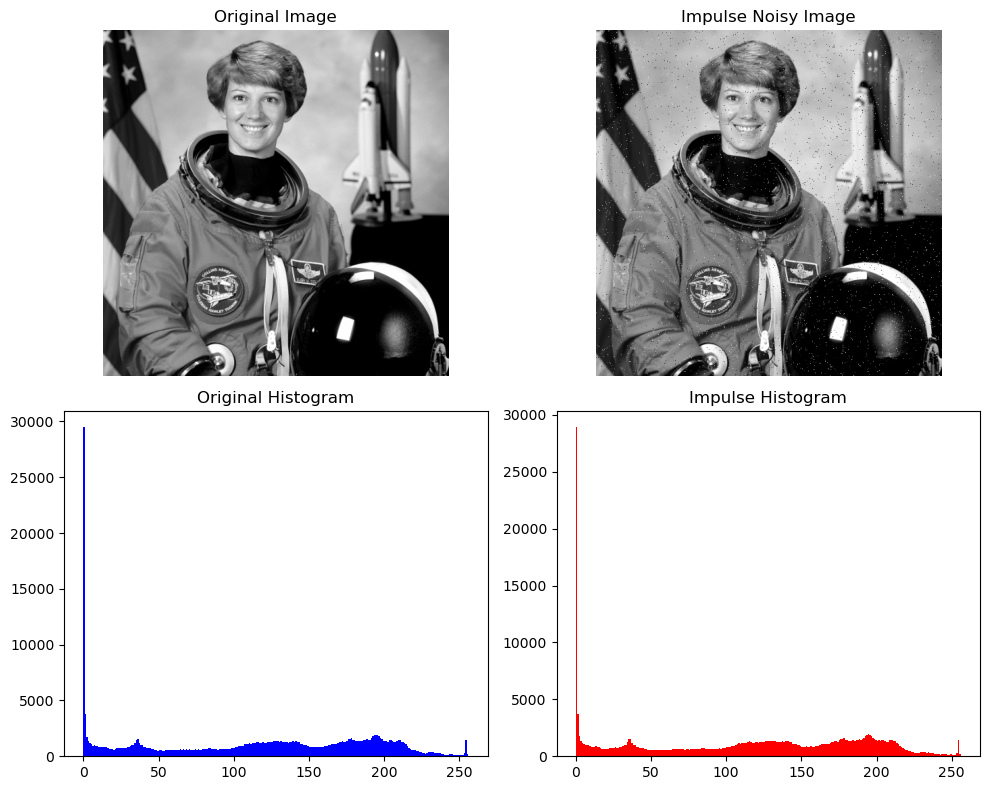

In [51]:
# -------------------- IMPORTS --------------------
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray


# -------------------- NOISE FUNCTIONS --------------------
def add_gaussian_noise(image, mean=0, sigma=25):
    """Add Gaussian noise"""
    gauss = np.random.normal(mean, sigma, image.shape).astype('float32')
    noisy = image.astype('float32') + gauss
    noisy = np.clip(noisy, 0, 255).astype('uint8')
    return noisy

def add_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    """Add Salt & Pepper noise"""
    noisy = np.copy(image)
    total_pixels = image.size

    # Salt noise
    num_salt = int(total_pixels * salt_prob)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy[tuple(coords)] = 255

    # Pepper noise
    num_pepper = int(total_pixels * pepper_prob)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy[tuple(coords)] = 0

    return noisy

def add_impulse_noise(image, noise_prob=0.02):
    """Add Impulse noise (random intensity spikes)"""
    noisy = np.copy(image)
    mask = np.random.choice([0,1], size=image.shape, p=[1-noise_prob, noise_prob])
    random_vals = np.random.randint(0, 256, image.shape, dtype='uint8')
    noisy[mask==1] = random_vals[mask==1]
    return noisy


# -------------------- HISTOGRAM PLOTTING --------------------
def show_results(original, noisy, title):
    """Display original + noisy image with histograms"""
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Original Image
    axs[0,0].imshow(original, cmap='gray')
    axs[0,0].set_title("Original Image")
    axs[0,0].axis('off')

    # Noisy Image
    axs[0,1].imshow(noisy, cmap='gray')
    axs[0,1].set_title(f"{title} Noisy Image")
    axs[0,1].axis('off')

    # Original Histogram
    axs[1,0].hist(original.ravel(), bins=256, range=[0,256], color='blue')
    axs[1,0].set_title("Original Histogram")

    # Noisy Histogram
    axs[1,1].hist(noisy.ravel(), bins=256, range=[0,256], color='red')
    axs[1,1].set_title(f"{title} Histogram")

    plt.tight_layout()
    plt.show()


# -------------------- MAIN PROGRAM --------------------
# Load Lena image (from skimage)
lena = data.astronaut()   # RGB test image (astronaut/lena)
gray_lena = rgb2gray(lena) * 255   # Convert to grayscale and scale to 0-255
image = gray_lena.astype('uint8')

# Apply noise
gaussian_img = add_gaussian_noise(image)
sp_img = add_salt_pepper_noise(image)
impulse_img = add_impulse_noise(image)

# Show results
show_results(image, gaussian_img, "Gaussian")
show_results(image, sp_img, "Salt & Pepper")
show_results(image, impulse_img, "Impulse")
